# Unsupervised Learning - Principal Components Analysis



## Practical

Review PCA concepts.

### Exercise 1 - Crowdedness at the Campus Gym

The dataset consists of 26,000 people counts (about every 10 minutes) over the last year. In addition, I gathered extra info including weather and semester-specific information that might affect how crowded it is. The label is the number of people, which I'd like to predict given some subset of the features.

Label:

- Number of people

Features:

- timestamp (int; number of seconds since beginning of day)
- day_of_week (int; 0 - 6)
- is_weekend (int; 0 or 1)
- is_holiday (int; 0 or 1)
- apparent_temperature (float; degrees fahrenheit)
- temperature (float; degrees fahrenheit)
- is_start_of_semester (int; 0 or 1)

[Based off the Kaggle dataset](https://www.kaggle.com/nsrose7224/crowdedness-at-the-campus-gym).

**Task** - We are going to apply Principal Component Analysis on the given dataset using scikit-learn (bonus points if you use your own optimized Python version). We want to find the components with the maximum variance. Features with little or no variance are dropped and then the data is trained on transformed dataset to apply machine learning models.

1. Read in the gym dataset.
2. Explore the data, the summay statistics and identify any strong positive or negative correlations between the features.
3. Convert temperature and apparent temperature from Fahrenheit to Celcius.
4. Extract the features to a new dataframe. The column you would eventually predict is `number_people`.
5. Make a heatmap of the correlation.
6. Run PCA on the feature dataframe, and plot the explained variance ratio of the principal components.
7. Which components would you drop and why?
8. Re-run PCA on the feature dataframe, restricting it to the number of principal components you want and plot the explained variance ratios again.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

gym = pd.read_csv('gym.csv')
gym.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,apparent_temperature,temperature,is_start_of_semester
0,0,11,5,1,0,63.0,63.0,0
1,0,906,5,1,0,63.0,63.0,0
2,0,1207,5,1,0,63.0,63.0,0
3,0,1507,5,1,0,63.0,63.0,0
4,0,1808,5,1,0,63.0,63.0,0


In [29]:
gym.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,apparent_temperature,temperature,is_start_of_semester
count,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000
mean,41.055743,49427.729801,3.016458,0.291759,0.011509,59.013831,59.160459,0.100169
std,24.768592,22472.238011,2.005325,0.454581,0.106664,6.951850,6.661657,0.300231
min,0.000000,9.000000,0.000000,0.000000,0.000000,32.320000,38.140000,0.000000
25%,24.000000,31818.000000,1.000000,0.000000,0.000000,54.550000,54.550000,0.000000
50%,43.000000,49824.500000,3.000000,0.000000,0.000000,58.800000,58.800000,0.000000
75%,58.000000,68413.000000,5.000000,1.000000,0.000000,63.530000,63.530000,0.000000
max,138.000000,86120.000000,6.000000,1.000000,1.000000,87.170000,87.170000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118414ef0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ce4e710>]], dtype=object)

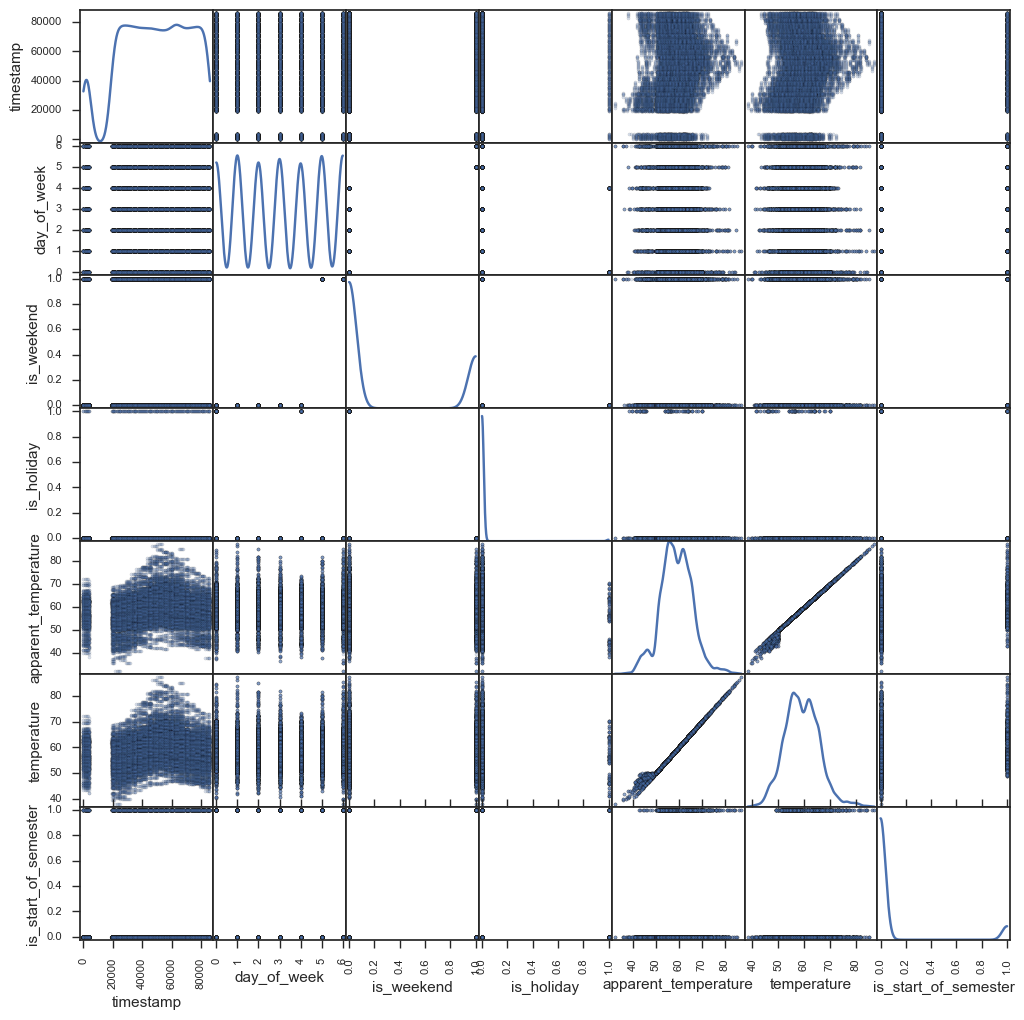

In [22]:
from pandas.tools.plotting import scatter_matrix

gym2 = gym[['timestamp', 'day_of_week', 'is_weekend', 'is_holiday','apparent_temperature', 'temperature', 'is_start_of_semester']]
scatter_matrix(gym2, alpha=0.2, figsize=(12,12), diagonal='kde')

In [23]:
gym2.corr(method='pearson')

,timestamp,day_of_week,is_weekend,is_holiday,apparent_temperature,temperature,is_start_of_semester
timestamp,1.000000,0.002188,0.005774,0.000015,0.135663,0.134209,-0.008029
day_of_week,0.002188,1.000000,0.795182,-0.090568,-0.011553,-0.011030,0.005801
is_weekend,0.005774,0.795182,1.000000,-0.069256,0.003095,0.003079,0.003434
is_holiday,0.000015,-0.090568,-0.069256,1.000000,-0.068055,-0.059206,0.083802
apparent_temperature,0.135663,-0.011553,0.003095,-0.068055,1.000000,0.995839,0.092622
temperature,0.134209,-0.011030,0.003079,-0.059206,0.995839,1.000000,0.092255
is_start_of_semester,-0.008029,0.005801,0.003434,0.083802,0.092622,0.092255,1.000000


Strong correlation between apparent temperature and temperature.

In [30]:
gym['apparent_temp_Celcius'] = (gym['apparent_temperature'] - 32) * 5/9
gym['temp_Celcius'] = (gym['temperature'] - 32) * 5/9
gym.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,apparent_temperature,temperature,is_start_of_semester,apparent_temp_Celcius,temp_Celcius
0,0,11,5,1,0,63.0,63.0,0,17.222222,17.222222
1,0,906,5,1,0,63.0,63.0,0,17.222222,17.222222
2,0,1207,5,1,0,63.0,63.0,0,17.222222,17.222222
3,0,1507,5,1,0,63.0,63.0,0,17.222222,17.222222
4,0,1808,5,1,0,63.0,63.0,0,17.222222,17.222222


In [44]:
gym_new = gym[['timestamp', 'day_of_week', 'is_weekend', 'is_holiday',
               'is_start_of_semester','apparent_temp_Celcius', 'temp_Celcius']]
gym_new.head()

,timestamp,day_of_week,is_weekend,is_holiday,is_start_of_semester,apparent_temp_Celcius,temp_Celcius
0,11,5,1,0,0,17.222222,17.222222
1,906,5,1,0,0,17.222222,17.222222
2,1207,5,1,0,0,17.222222,17.222222
3,1507,5,1,0,0,17.222222,17.222222
4,1808,5,1,0,0,17.222222,17.222222


In [45]:
gym_corr = gym_new.corr()

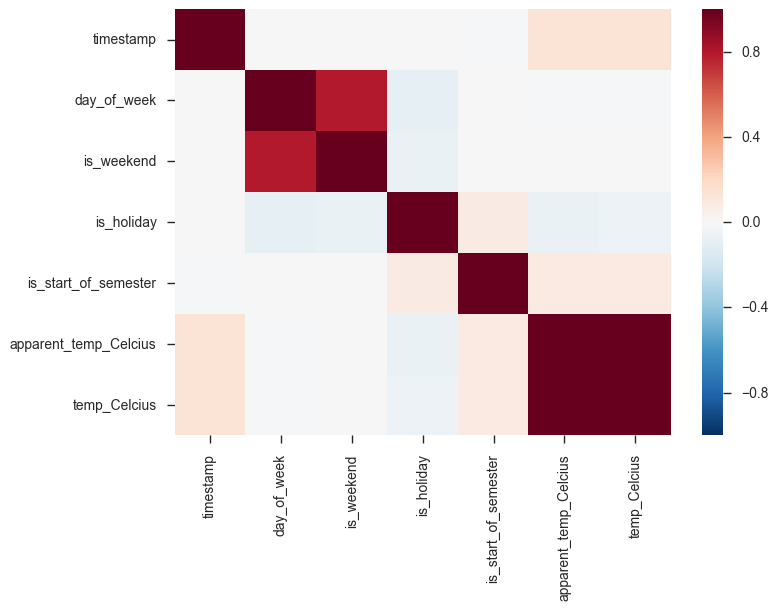

In [46]:
sns.heatmap(gym_corr, 
        xticklabels=gym_corr.columns,
        yticklabels=gym_corr.columns)

# Run PCA on Features

In [47]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(gym_new), index=gym_new.index, columns=gym_new.columns)

In [48]:
from sklearn.decomposition import PCA
pca = PCA()

gym_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], index=X.index)
gym_plot.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.394224,-1.780205,-0.089300,-2.031606,-1.187700,0.393890,0.000626
1,0.401231,-1.780307,-0.085068,-1.994894,-1.174606,0.393856,0.000581
2,0.403588,-1.780342,-0.083644,-1.982547,-1.170203,0.393845,0.000566
3,0.405937,-1.780376,-0.082226,-1.970241,-1.165814,0.393833,0.000551
4,0.408294,-1.780410,-0.080802,-1.957895,-1.161410,0.393822,0.000536


In [50]:
pca.explained_variance_ratio_

array([ 0.29321519,  0.25870224,  0.15378657,  0.13950357,  0.12501011,
        0.02919394,  0.00058838])

([<matplotlib.axis.XTick at 0x129ef2f98>,
 <a list of 7 Text xticklabel objects>)

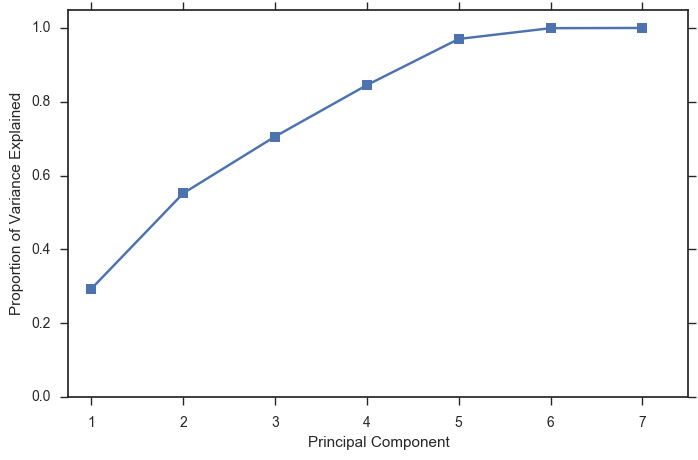

In [57]:
plt.figure(figsize=(8,5))
plt.plot([1,2,3,4,5,6,7], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,7.5)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7])

In [63]:
np.sum(pca.explained_variance_ratio_[:5])

0.97021768315130485

In [66]:
pca5 = PCA(n_components = 5)

gym_plot2 = pd.DataFrame(pca5.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=X.index)
gym_plot2.head()

,PC1,PC2,PC3,PC4,PC5
0,0.394224,-1.780205,-0.089300,-2.031606,-1.187700
1,0.401231,-1.780307,-0.085068,-1.994894,-1.174606
2,0.403588,-1.780342,-0.083644,-1.982547,-1.170203
3,0.405937,-1.780376,-0.082226,-1.970241,-1.165814
4,0.408294,-1.780410,-0.080802,-1.957895,-1.161410


I would cut the last two principal components out because we can explain 97% of the variance with the first 5 PCs.

([<matplotlib.axis.XTick at 0x12aa7c898>,
 <a list of 5 Text xticklabel objects>)

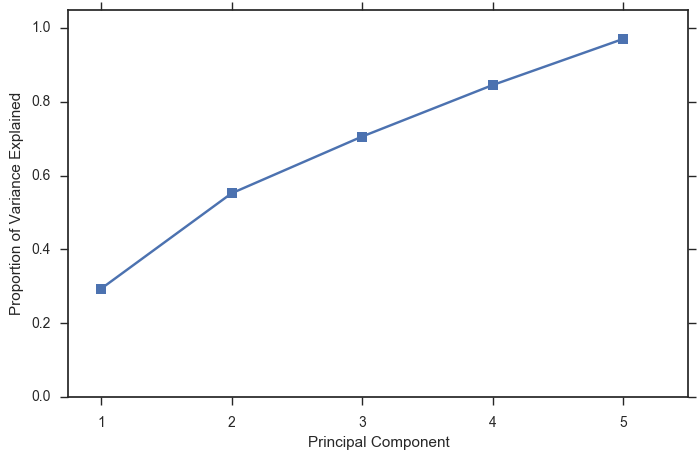

In [68]:
plt.figure(figsize=(8,5))
plt.plot([1,2,3,4,5], np.cumsum(pca5.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,5.5)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5])

### Exercise 2 - IMDB Movie Data

How can we tell the greatness of a movie before it is released in cinema?

This question puzzled me for a long time since there is no universal way to claim the goodness of movies. Many people rely on critics to gauge the quality of a film, while others use their instincts. But it takes the time to obtain a reasonable amount of critics review after a movie is released. And human instinct sometimes is unreliable.

To answer this question, I scraped 5000+ movies from IMDB website using a Python library called "scrapy".

The scraping process took 2 hours to finish. In the end, I was able to obtain all needed 28 variables for 5043 movies and 4906 posters (998MB), spanning across 100 years in 66 countries. There are 2399 unique director names, and thousands of actors/actresses. Below are the 28 variables:

"movie_title" "color" "num_critic_for_reviews" "movie_facebook_likes" "duration" "director_name" "director_facebook_likes" "actor_3_name" "actor_3_facebook_likes" "actor_2_name" "actor_2_facebook_likes" "actor_1_name" "actor_1_facebook_likes" "gross" "genres" "num_voted_users" "cast_total_facebook_likes" "facenumber_in_poster" "plot_keywords" "movie_imdb_link" "num_user_for_reviews" "language" "country" "content_rating" "budget" "title_year" "imdb_score" "aspect_ratio"


[Based off the Kaggle dataset](https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset).

**Task** - We are going to apply Principal Component Analysis on the given dataset using scikit-learn (bonus points if you use your own optimized Python version). We want to find the components with the maximum variance. Features with little or no variance are dropped and then the data is trained on transformed dataset to apply machine learning models.

1. Read in the movie dataset.
2. Explore the data, the summay statistics and identify any strong positive or negative correlations between the features.
3. Some columns contain numbers, while others contain words. Do some filtering to extract only the numbered columns and not the ones with words into a new dataframe.
4. Remove null values and standardize the values.
5. Create hexbin visualizations to get a feel for how the correlations between different features compare to one another. Can you draw any conclusions about the features?
6. Create a heatmap of the pearson correlation of movie features. Detail your observations.
7. Perform PCA on the dataset, and plot the individual and cumulative explained variance superimposed on the same graph.
8. How many components do you want to use? Implement PCA and transform the dataset.
9. Create a 2D and 3D scatter plot of the the 1st 2 and the 1st 3 components.
10. Do you notice any distinct clusters in the plots? (*For future clustering assignment*)

In [130]:
movie = pd.read_csv('movie.csv')
movie = movie.dropna(how='any')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [98]:
movie_corr.style.background_gradient()

In [107]:
movie.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [100]:
movie.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3.756000e+03,3.756000e+03,3756.000000,3756.000000,3756.000000,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,167.378328,110.257987,807.336528,771.279553,7751.338658,5.261282e+07,1.058267e+05,11527.101970,1.377263,336.843184,4.623685e+07,2002.976571,2021.775825,6.465282,2.111014,9353.829340
std,123.452040,22.646717,3068.171683,1894.249869,15519.339621,7.031787e+07,1.520354e+05,19122.176905,2.041541,411.227368,2.260103e+08,9.888108,4544.908236,1.056247,0.353068,21462.889123
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,77.000000,96.000000,11.000000,194.000000,745.000000,8.270233e+06,1.966700e+04,1919.750000,0.000000,110.000000,1.000000e+07,1999.000000,384.750000,5.900000,1.850000,0.000000
50%,138.500000,106.000000,64.000000,436.000000,1000.000000,3.009311e+07,5.397350e+04,4059.500000,1.000000,210.000000,2.500000e+07,2004.000000,685.500000,6.600000,2.350000,227.000000
75%,224.000000,120.000000,235.000000,691.000000,13000.000000,6.688194e+07,1.286020e+05,16240.000000,2.000000,398.250000,5.000000e+07,2010.000000,976.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


In [142]:
movie_num = movie.select_dtypes(include=['float64', 'int64'])
movie_num = movie_num.reset_index(drop=True)
movie_num.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [186]:
movie_scale = pd.DataFrame(scale(movie_num), index=movie_num.index, columns=movie_num.columns)
movie_scale.head()

/Users/mac/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,4.501308,2.991649,-0.263168,0.044203,-0.435085,10.068384,5.133549,-0.350064,-0.674709,6.608312,0.844159,0.609240,-0.238931,1.358498,-0.937662,1.101870
1,1.090623,2.594188,-0.079646,0.120761,2.078243,3.652351,2.403663,1.925921,-0.674709,2.191675,1.122944,0.406950,0.655375,0.600998,0.676973,-0.435872
2,3.521040,1.666778,-0.263168,-0.322218,0.209358,2.097347,1.118581,0.009043,-0.184818,1.598250,0.879560,1.216110,-0.358421,0.316936,0.676973,3.524979
3,5.230433,2.373376,6.908181,11.736403,1.240467,5.625462,6.831623,4.980844,-0.674709,5.749791,0.901686,0.912675,4.616379,1.926622,0.676973,7.206241
4,2.386845,0.960179,-0.108332,-0.127392,-0.458285,0.290802,0.699781,-0.504931,-0.184818,0.975641,0.962311,0.912675,-0.305828,0.127561,0.676973,0.682486


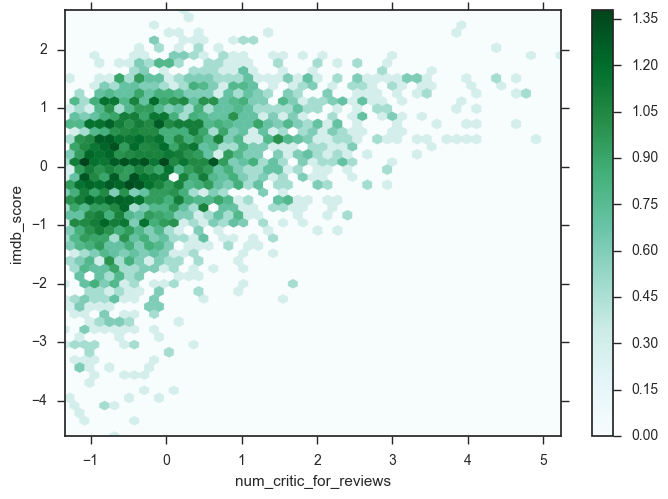

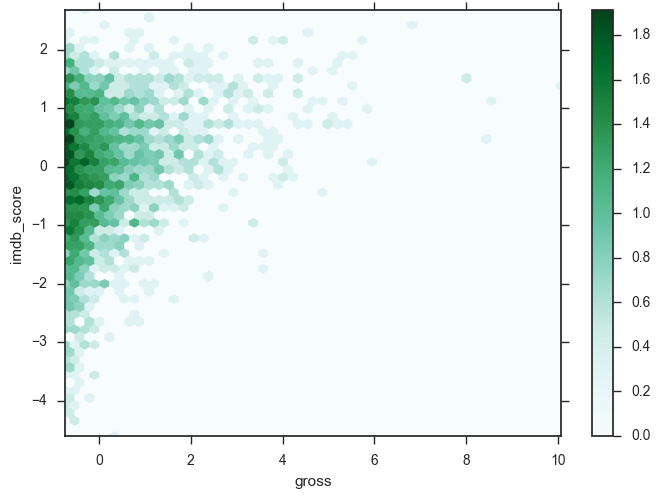

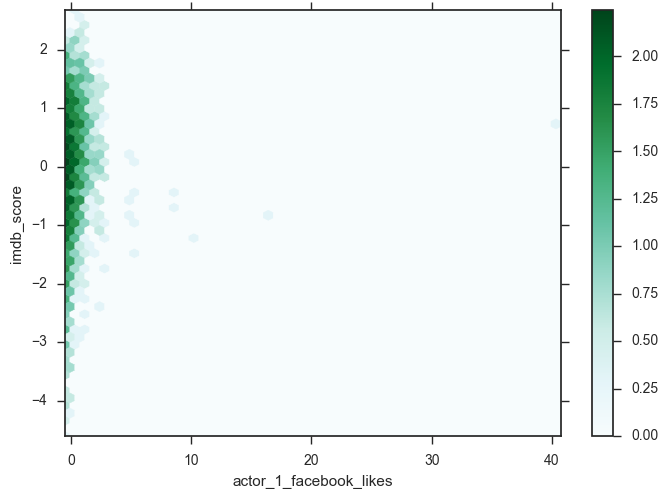

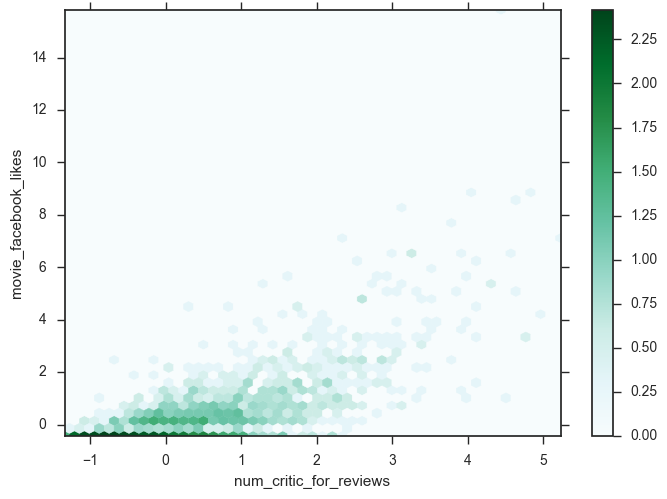

In [240]:
movie_scale.plot(kind='hexbin', x='num_critic_for_reviews', y='imdb_score', gridsize=50, sharex=False, bins='log')
movie_scale.plot(kind='hexbin', x='gross', y='imdb_score', gridsize=50, sharex=False, bins='log')
movie_scale.plot(kind='hexbin', x='actor_1_facebook_likes', y='imdb_score', gridsize=50, sharex=False, bins='log')
movie_scale.plot(kind='hexbin', x='num_critic_for_reviews', y='movie_facebook_likes', gridsize=50, sharex=False, bins='log')

Not really much relationship showing in the hexbins.

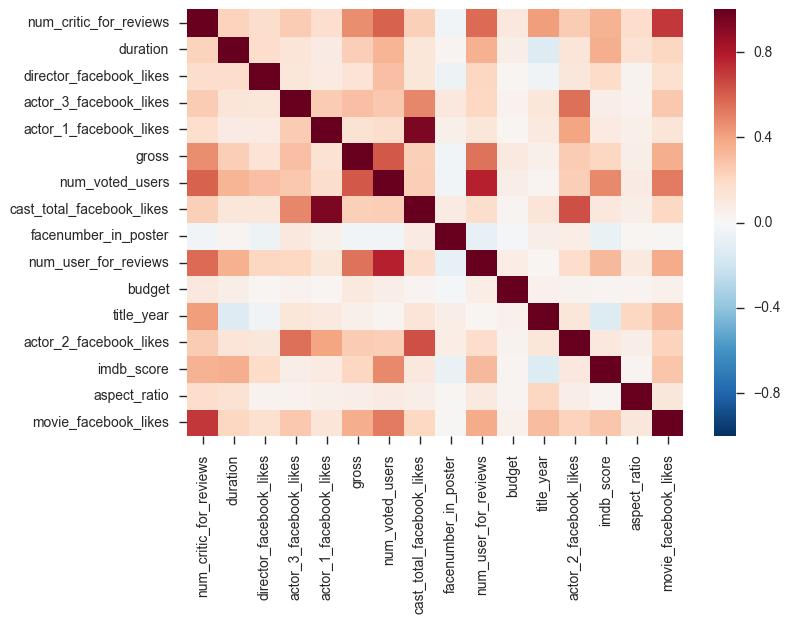

In [167]:
movie_corr = movie.corr()
sns.heatmap(movie_corr, 
        xticklabels=movie_corr.columns,
        yticklabels=movie_corr.columns)

Strong positive correlation between actor_1_facebook_likes and cast_total_facebook_likes, num_critic_for_reviews and 
move_facebook_likes, num_user_for_reviews and num_voted_users. Not much correlation between imdb_score and other features. 

In [176]:
pca_movie = PCA()
movie_pca = pd.DataFrame(pca_movie.fit_transform(movie_scale), index=movie_scale.index)
movie_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-10.062732,6.459987,0.188004,3.367546,1.225438,-1.610034,-3.006978,-2.792726,-3.722752,-1.696935,-1.182041,3.249928,-0.664055,-1.344143,0.524207,-0.064306
1,-5.122546,0.242036,1.283265,-0.218244,-1.222990,-1.273632,-1.780138,-1.209057,-1.706266,-1.254943,-0.841141,1.459410,-0.109892,0.068698,-0.357125,0.005904
2,-4.526501,2.318964,-2.516145,-0.034980,-0.328494,-0.353390,-1.059780,0.680289,0.125895,-1.447747,1.410228,0.124639,-0.445443,-0.762189,0.285744,-0.043776
3,-18.633879,-0.926474,0.424735,2.610935,2.430146,-0.387211,6.801008,-2.392221,1.492200,0.121016,2.186036,-0.436030,3.764730,0.587637,0.451284,0.807344
4,-1.842571,1.676556,-1.598686,-0.379143,-0.447832,-0.687887,-0.242161,0.169460,0.159033,-0.557863,-0.295012,-0.442551,0.094435,-0.959108,-0.499483,-0.029675


In [177]:
pca_movie.explained_variance_ratio_

array([  2.77218419e-01,   1.34013586e-01,   9.39882513e-02,
         6.56599397e-02,   6.33562415e-02,   6.22597562e-02,
         5.52249143e-02,   5.41416854e-02,   4.87198295e-02,
         3.70939480e-02,   2.99796924e-02,   2.77240312e-02,
         2.59997094e-02,   1.51703782e-02,   9.33891880e-03,
         1.10699395e-04])

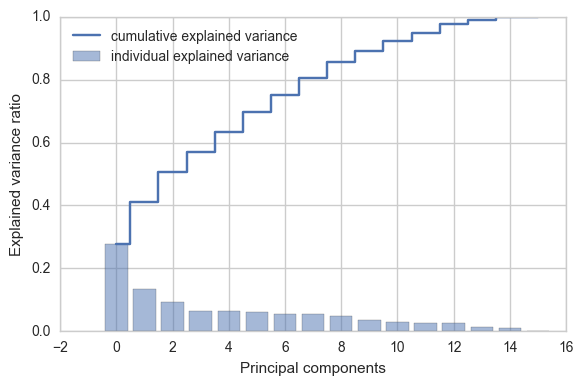

In [180]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(16), pca_movie.explained_variance_ratio_, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(16), np.cumsum(pca_movie.explained_variance_ratio_), where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.ylim(0,1)
    plt.show()

In [191]:
np.cumsum(pca_movie.explained_variance_ratio_)

array([ 0.27721842,  0.411232  ,  0.50522026,  0.5708802 ,  0.63423644,
        0.69649619,  0.75172111,  0.80586279,  0.85458262,  0.89167657,
        0.92165626,  0.94938029,  0.97538   ,  0.99055038,  0.9998893 ,  1.        ])

If we want to explain 85% of the variance, we'd choose up to the 9th PC.

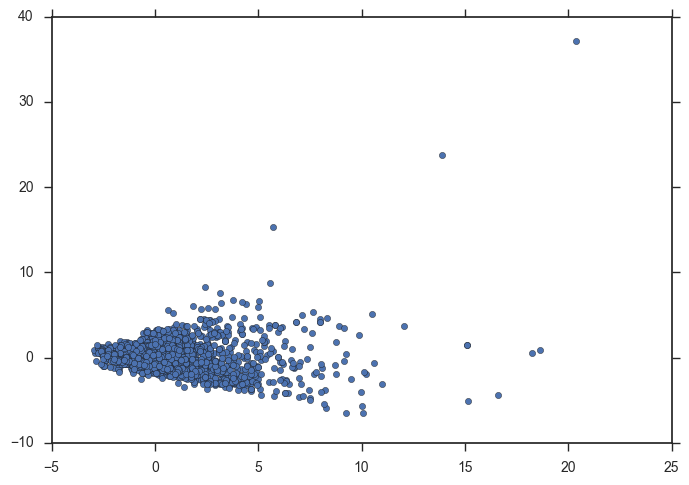

In [217]:
from sklearn.preprocessing import StandardScaler
X = movie_num.values
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_std)
plt.scatter(-X_pca[:,0], -X_pca[:,1])


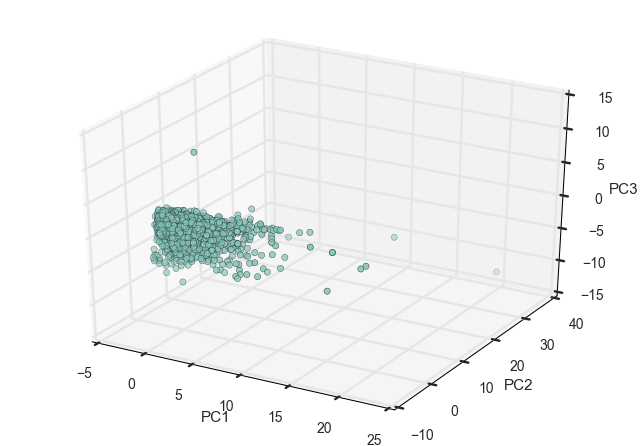

In [233]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
rgb = np.random.random((10, 3))
ax.scatter(-X_pca[:,0], -X_pca[:,1], -X_pca[:,2], facecolors=rgb)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

Doesn't look like there are truly distinct clusters, but a lot of the points are grouped to the left of the graph. Some points go out a little further.